<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-10 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Simple AutoEncoders with Image Data </h2> </html>

Here is a simple autoencoder with just the dense layers.


Load the data and import the libraries.

In [1]:
# Your code to import matplotlib, pandas and numpy libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

_______________________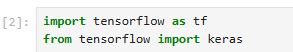

In [2]:
import tensorflow as tf
from tensorflow import keras

__________________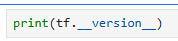

In [3]:
print(tf.__version__)

2.18.0


2.18.0


____________________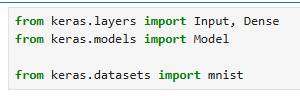

In [4]:
from keras.layers import Input, Dense 
from keras.models import Model
from keras.datasets import mnist

In [5]:
# Your code to load MNIST data and store it in variables x_train, x_test. 
# Note -  we do not need labels as it's autoencoder.
(x_train, _), (x_test, _)=mnist.load_data()



______________________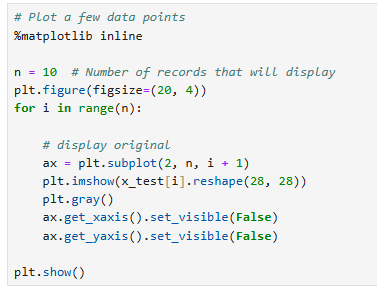

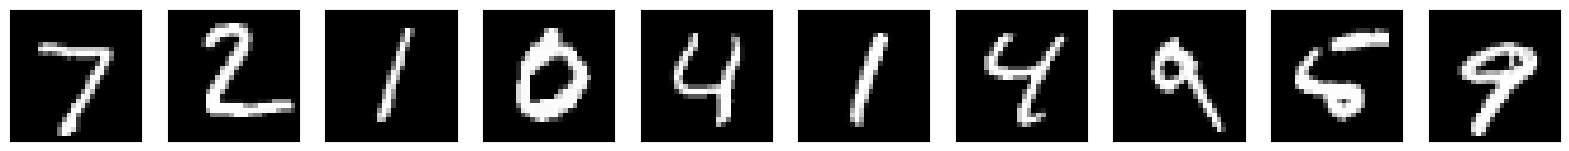

In [6]:
%matplotlib inline 
n= 10 
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

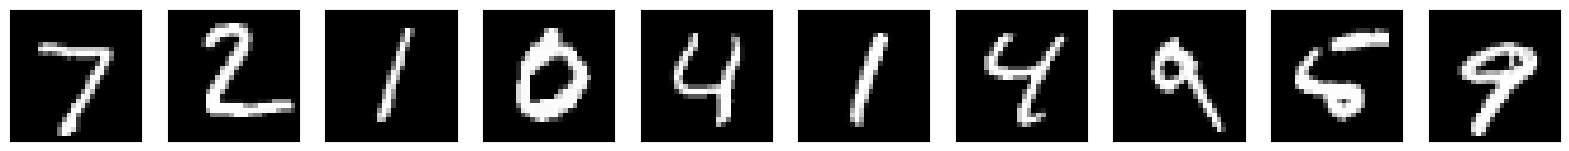

In [7]:
# Normalizing train data
x_train = x_train / 255.0

# Normalizing test data
x_test = x_test / 255.0


<html> <h3 style="font-style:italic; color:blue;"> Basic AutoEncoder : </h3> </html>

Build a basic symmetric encoder-decoder network that recreates the image.  
This network could be used in dimensionaliry reduction or feature learning. 


________________________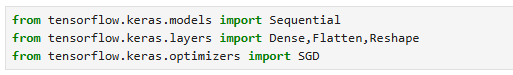

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Reshape
from tensorflow.keras.optimizers import SGD


In [14]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(Dense(140, activation='relu'))  

encoder.add(Dense(120, activation='relu'))  
encoder.add(Dense(100, activation='relu'))  
encoder.add(Dense(80, activation='relu'))              
encoder.add(Dense(60, activation='relu'))

C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Your code to print your Encoder model
print(encoder.summary())
#


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 140)            │       109,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 120)            │        16,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 60)             │         4,860 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,860 (593.20 KB)

 Trainable params: 151,860 (593.20 KB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
decoder = Sequential()
decoder.add(Dense(80,input_shape=[60],activation='relu'))


decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(120, activation='relu'))
decoder.add(Dense(140, activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))


In [17]:
decoder.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 80)             │         4,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │         8,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 120)            │        12,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 140)            │        16,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       110,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,584 (596.03 KB)

 Trainable params: 152,584 (596.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Your code to print the Decoder model

#


In [24]:
# Your OWN Decoder model should be printed here 
# Please do not copy the model below

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       314,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,384 (1.61 MB)

 Trainable params: 421,384 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


____________________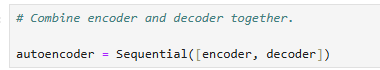

In [18]:
autoencoder  = Sequential([encoder, decoder])

In [19]:
# Your code to print the Autoencoder model
# Assuming `autoencoder` is the Sequential model combining the encoder and decoder
autoencoder.summary()

#

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 60)             │       151,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 28, 28)         │       152,584 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,444 (1.16 MB)

 Trainable params: 304,444 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Your OWN Autoencoder model should be printed here 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 25)             │       420,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28)         │       421,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842,009 (3.21 MB)

 Trainable params: 842,009 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [32]:
#SGD?

In [20]:
# Your code to compile the Autoencoder. 
# Use binary_crossenropy as loss and metrics as accuracy.
# Compiling the Autoencoder
autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])



___________________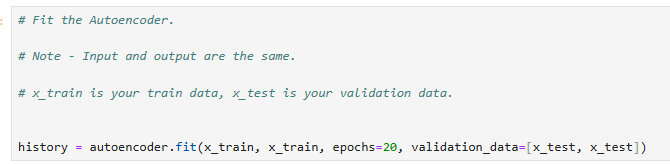

In [21]:
history = autoencoder.fit(x_train, x_train, epochs=20, validation_data=[x_test, x_test])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.1334 - loss: 0.2227 - val_accuracy: 0.2115 - val_loss: 0.1326
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2247 - loss: 0.1302 - val_accuracy: 0.2319 - val_loss: 0.1214
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2410 - loss: 0.1202 - val_accuracy: 0.2472 - val_loss: 0.1122
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2501 - loss: 0.1132 - val_accuracy: 0.2512 - val_loss: 0.1093
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2601 - loss: 0.1089 - val_accuracy: 0.2532 - val_loss: 0.1063
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2667 - loss: 0.1058 - val_accuracy: 0.2619 - val_loss: 0.1035
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2694 - loss: 0.1036 - val_accuracy: 0.2619 - val_loss: 0.1022
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2739 - loss: 0

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.1292 - loss: 0.2204 - val_accuracy: 0.2148 - val_loss: 0.1363
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2276 - loss: 0.1322 - val_accuracy: 0.2359 - val_loss: 0.1228
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.2437 - loss: 0.1210 - val_accuracy: 0.2509 - val_loss: 0.1165
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2539 - loss: 0.1154 - val_accuracy: 0.2514 - val_loss: 0.1127
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2595 - loss: 0.1113 - val_accuracy: 0.2601 - val_loss: 0.1081
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.2673 - loss: 0.1067 - val_accuracy: 0.2640 - val_loss: 0.1048
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2730 - loss: 0.1036 - val_accuracy: 0.2721 - val_loss: 0.1020
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2760 -

____________________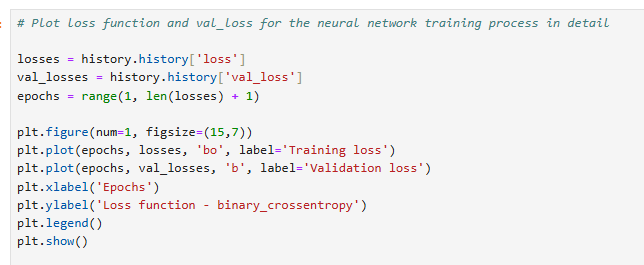

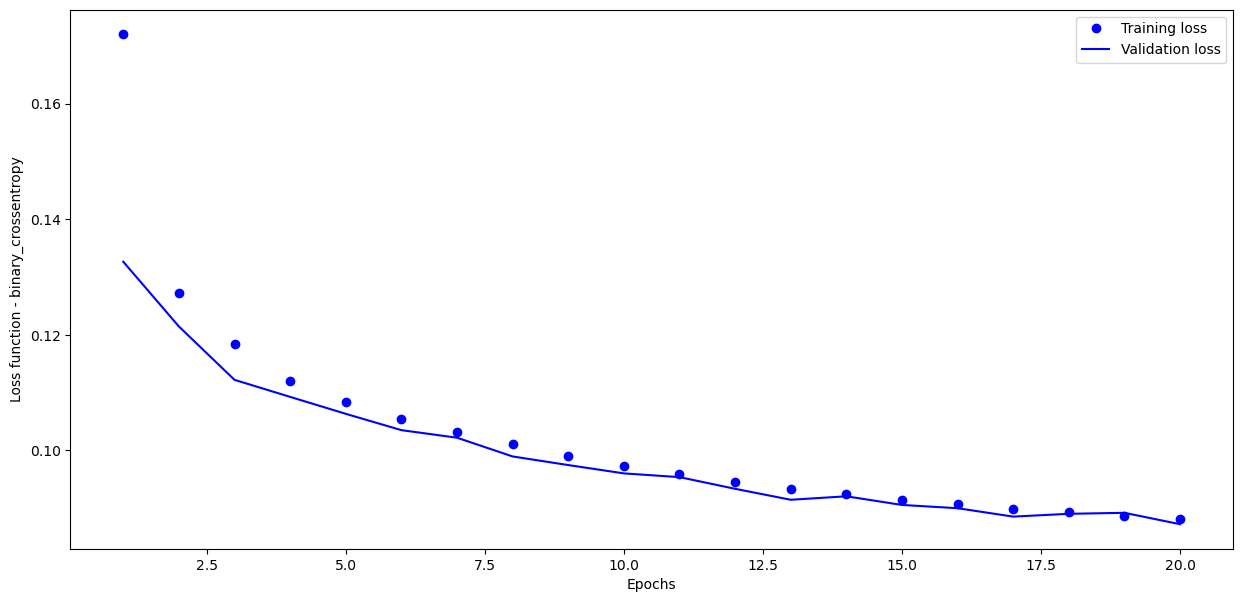

In [22]:
losses = history.history['loss']
val_losses= history.history['val_loss']
epochs= range(1, len(losses) + 1)
plt.figure(num = 1 , figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

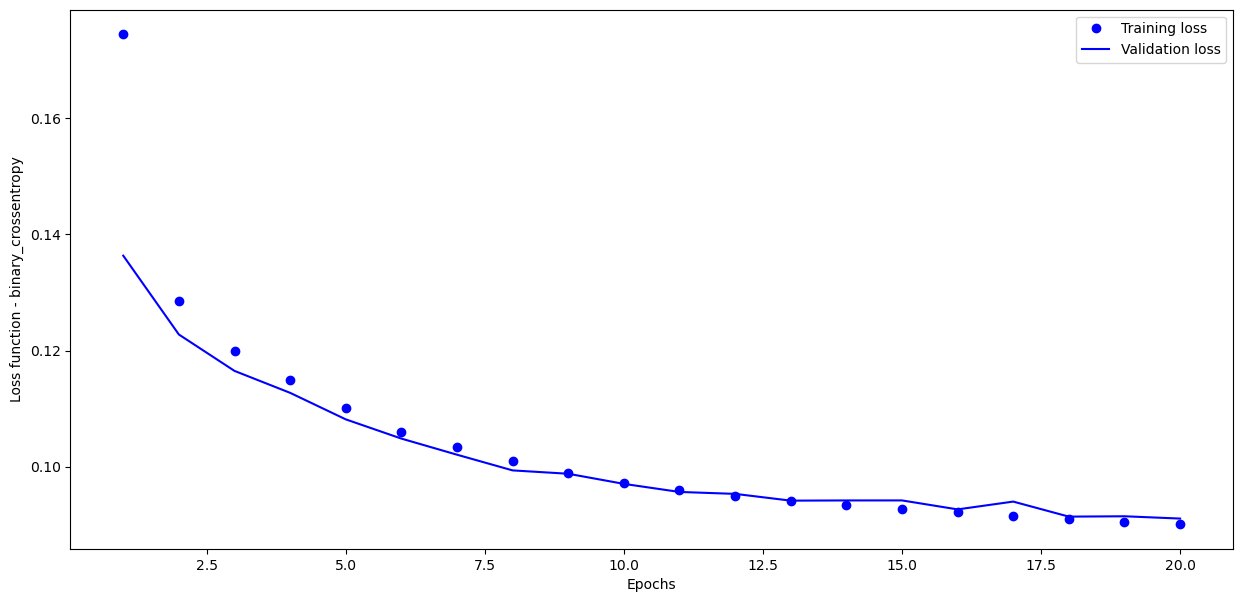

___________________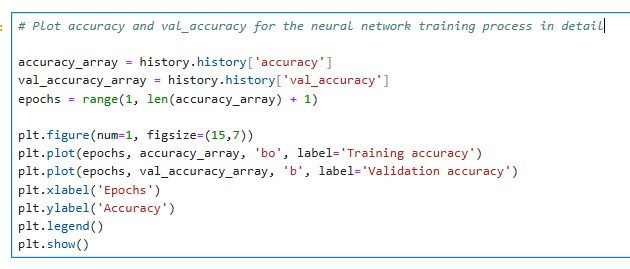

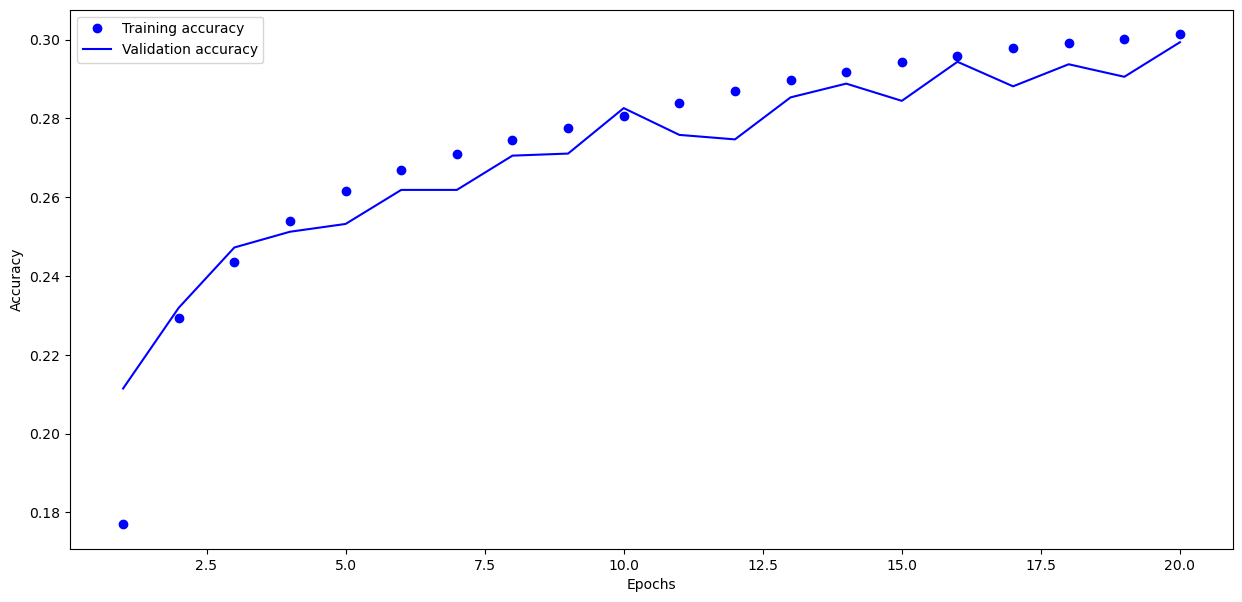

In [24]:

accuracy_array = history.history['accuracy']
val_accuracy_array=history.history['val_accuracy']
epochs=range(1, len(accuracy_array) +1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


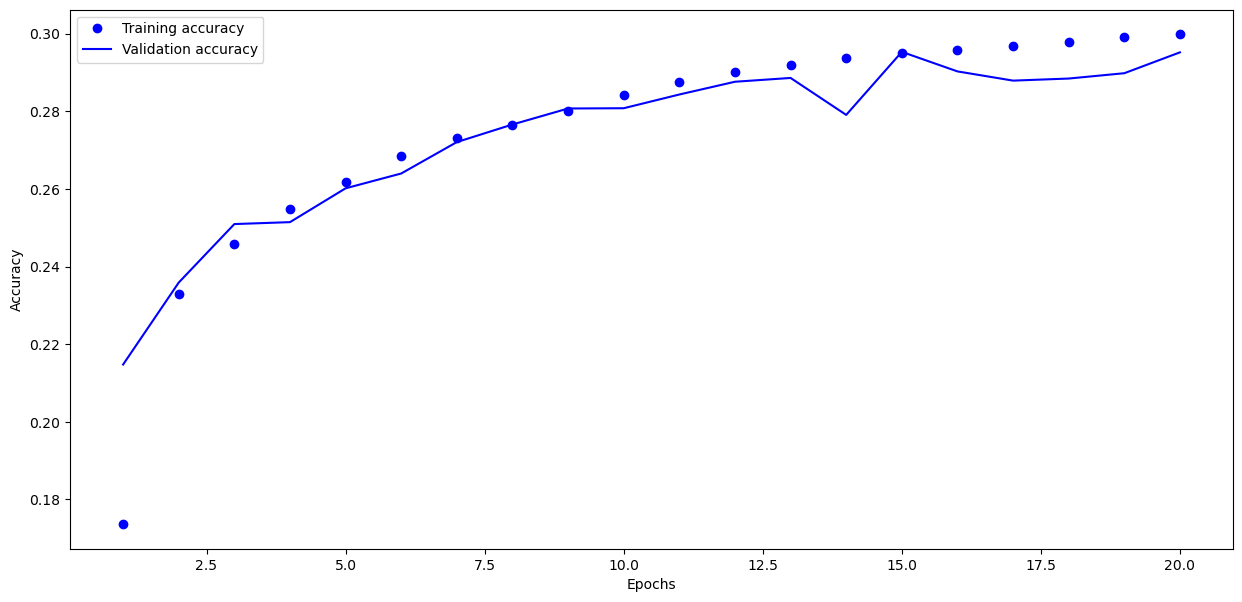

_______________________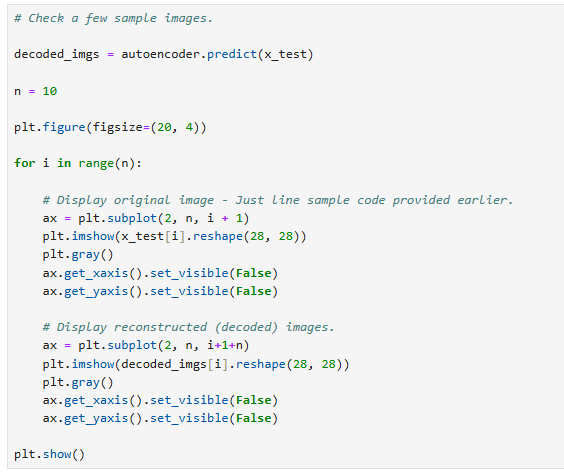

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


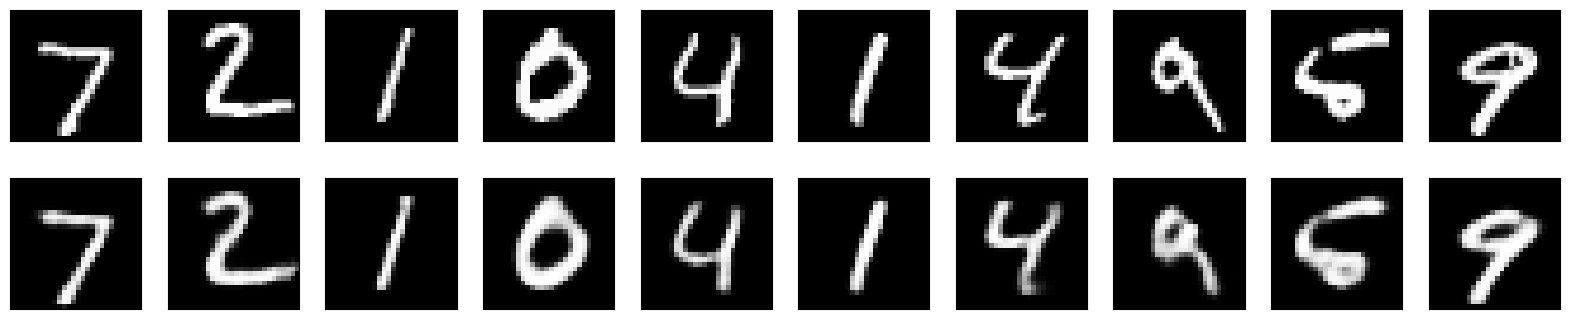

In [25]:
decoded_imgs = autoencoder.predict(x_test)

n=10

plt.figure(figsize=(20,4))
for i in range(n):

    ax=plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


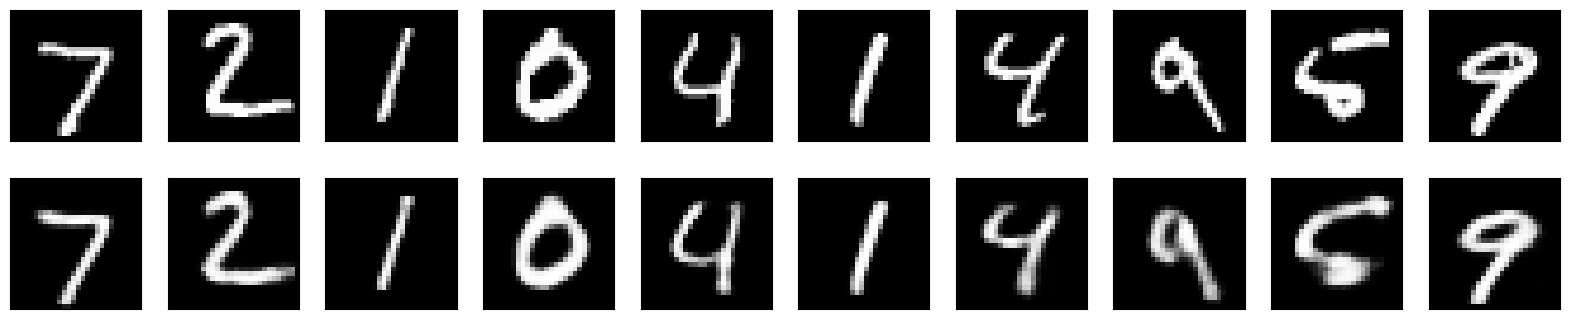

<html> <h3 style="font-style:italic; color:blue;"> AutoEncoders for Denoising Images : </h3> </html>

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 


______________________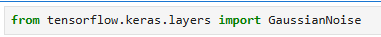

In [26]:
from tensorflow.keras.layers import GaussianNoise

In [149]:
#GaussianNoise?

___________________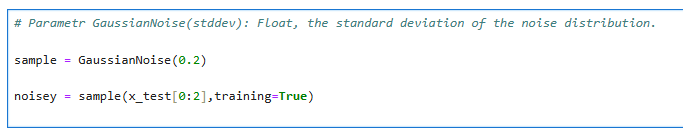

In [27]:
sample = GaussianNoise(0.2)
noisey= sample (x_test[0:2], training=True)

In [30]:
# Plot the original and noisy images
print(sample)

<GaussianNoise name=gaussian_noise, built=True>


_______________________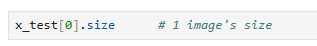

In [31]:
x_test[0].size

784

784

____________________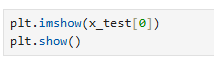

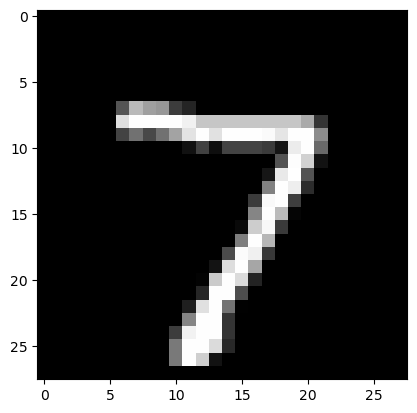

In [32]:
plt.imshow(x_test[0])
plt.show()

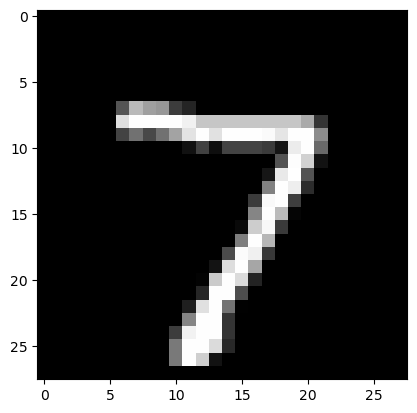

_____________________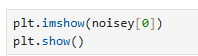

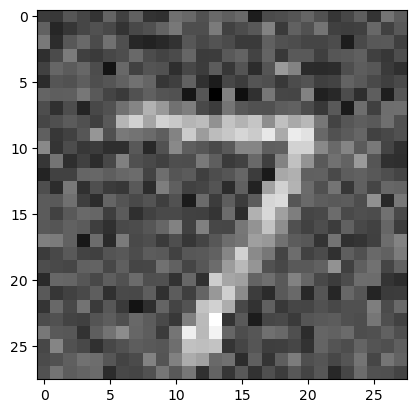

In [33]:
plt.imshow(noisey[0])
plt.show()

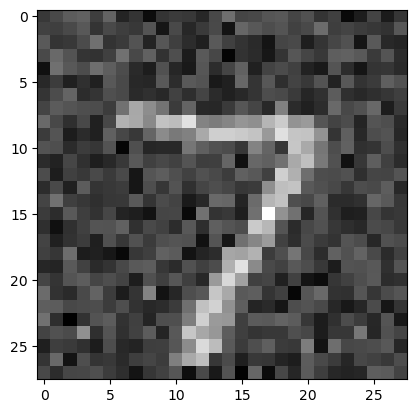

_________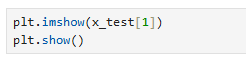

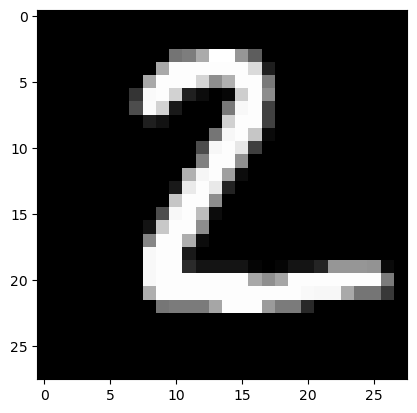

In [34]:
plt.imshow(x_test[1])
plt.show()

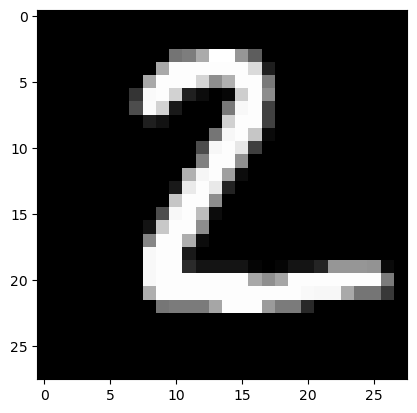

______________________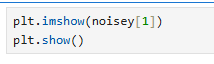

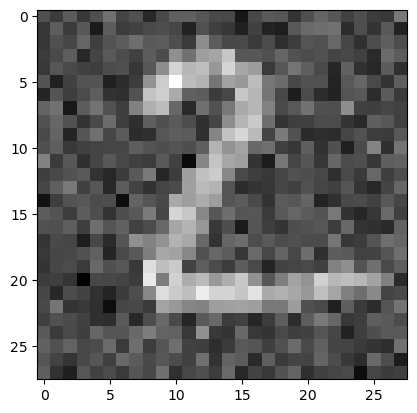

In [35]:
plt.imshow(noisey[1])
plt.show()

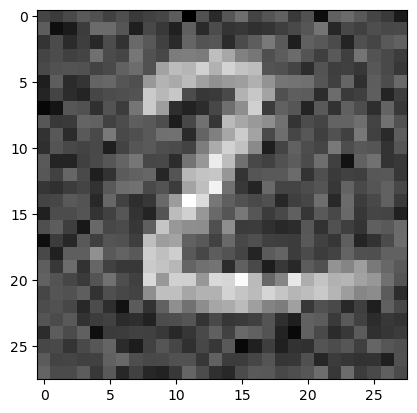

<html> <h4 style="font-style:italic; color:blue;"> Create a noise removal autoencoder and train it </h4> </html>

- Again similar to above it is a symmetric dense network. 
- Gaussian noise is added at the input so that the network sees noisy images and is able to map it to the clean outputs.


### Input - Images with noise
### Labels - Clean images.


In [36]:
# Encoder

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy images

encoder.add(Dense(80, activation='relu'))  
encoder.add(Dense(60, activation='relu'))  
encoder.add(Dense(40, activation='relu'))  
encoder.add(Dense(70, activation='relu'))              
encoder.add(Dense(50, activation='relu'))

print(encoder.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 784)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 80)             │        62,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 70)             │         2,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │         3,550 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,520 (298.91 KB)

 Trainable params: 76,520 (298.91 KB)

 Non-trainable params: 0 (0.00 B)

None


In [70]:
# Your OWN Encoder model should be printed here 
# Please do not copy the model below

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 784)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,625 (1.60 MB)

 Trainable params: 420,625 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [37]:
decoder = Sequential()
decoder.add(Dense(70,input_shape=[50],activation='relu'))

decoder.add(Dense(80, activation='relu'))
decoder.add(Dense(60, activation='relu'))
decoder.add(Dense(40, activation='relu'))


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

print(decoder.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 70)             │         3,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 80)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 784)            │        32,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,694 (190.21 KB)

 Trainable params: 48,694 (190.21 KB)

 Non-trainable params: 0 (0.00 B)

None


In [72]:
# Your OWN Decoder model should be printed here 
# Please do not copy the model below

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       314,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,384 (1.61 MB)

 Trainable params: 421,384 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


_________________________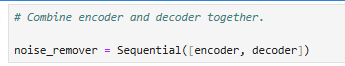

In [38]:
noise_remover=Sequential([encoder, decoder])

In [39]:
# Your code to print the Autoencoder model
autoencoder.summary()


#

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 60)             │       151,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 28, 28)         │       152,584 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 913,334 (3.48 MB)

 Trainable params: 304,444 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 608,890 (2.32 MB)

In [76]:
# Your OWN Autoencoder model should be printed here 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 25)             │       420,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 28, 28)         │       421,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842,009 (3.21 MB)

 Trainable params: 842,009 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [40]:
# Your code to compile the 'noise_remover' model with the same parameters as earlier

noise_remover.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])



In [41]:
# Your code to fit 'noise_remover' model with the same parameters as earlier

history = noise_remover.fit(x_train, x_train, epochs=20, validation_data=[x_test, x_test])


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.0954 - loss: 0.2608 - val_accuracy: 0.1775 - val_loss: 0.1637
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1860 - loss: 0.1618 - val_accuracy: 0.2008 - val_loss: 0.1466
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2048 - loss: 0.1470 - val_accuracy: 0.2160 - val_loss: 0.1379
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2154 - loss: 0.1396 - val_accuracy: 0.2173 - val_loss: 0.1320
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2209 - loss: 0.1340 - val_accuracy: 0.2270 - val_loss: 0.1269
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2253 - loss: 0.1308 - val_accuracy: 0.2256 - val_loss: 0.1251
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2284 - loss: 0.1279 - val_accuracy: 0.2368 - val_loss: 0.1209
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2345 - loss: 0

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 0.1332 - loss: 0.2187 - val_accuracy: 0.2117 - val_loss: 0.1395
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.2224 - loss: 0.1391 - val_accuracy: 0.2359 - val_loss: 0.1271
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2384 - loss: 0.1277 - val_accuracy: 0.2476 - val_loss: 0.1192
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.2482 - loss: 0.1217 - val_accuracy: 0.2563 - val_loss: 0.1146
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.2553 - loss: 0.1174 - val_accuracy: 0.2617 - val_loss: 0.1124
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2578 - loss: 0.1149 - val_accuracy: 0.2522 - val_loss: 0.1105
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.2612 - loss: 0.1129 - val_accuracy: 0.2681 - val_loss: 0.1079
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.2652 -

In [ ]:
# Hint: Use (copy and modify) the code from the cells above

___________________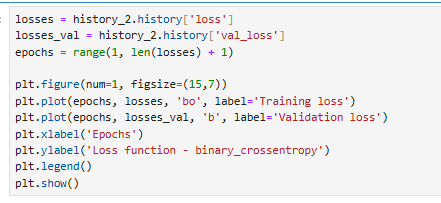

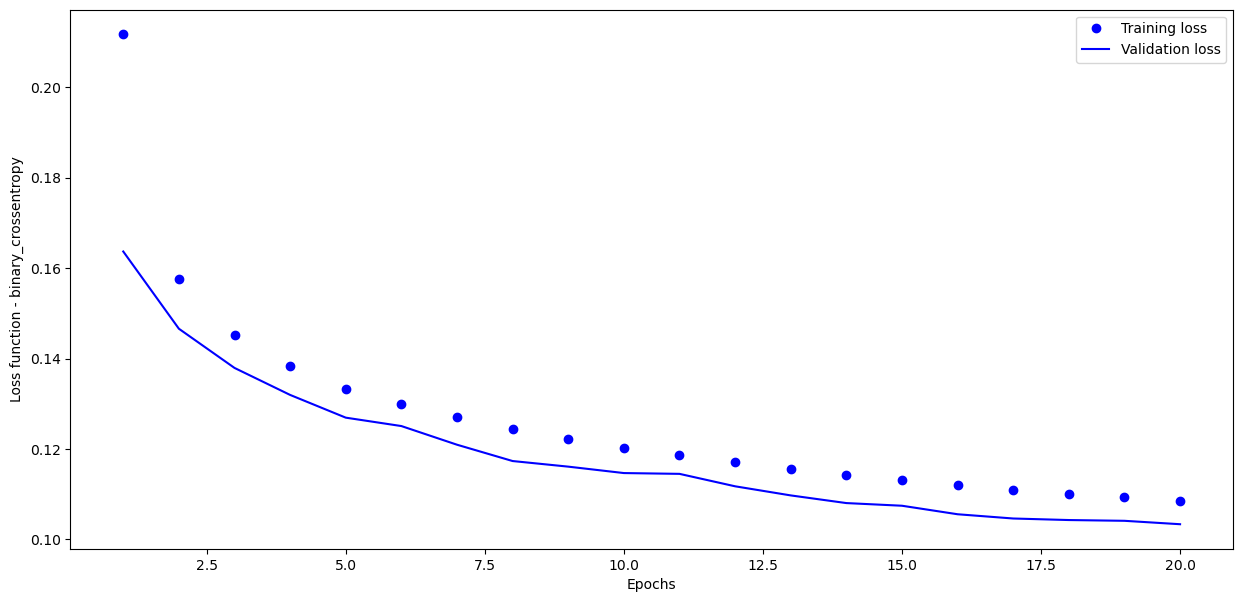

In [42]:
losses = history.history['loss']
losses_val =history.history['val_loss']
epochs=range(1, len(accuracy_array) +1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, losses_val, 'b', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()


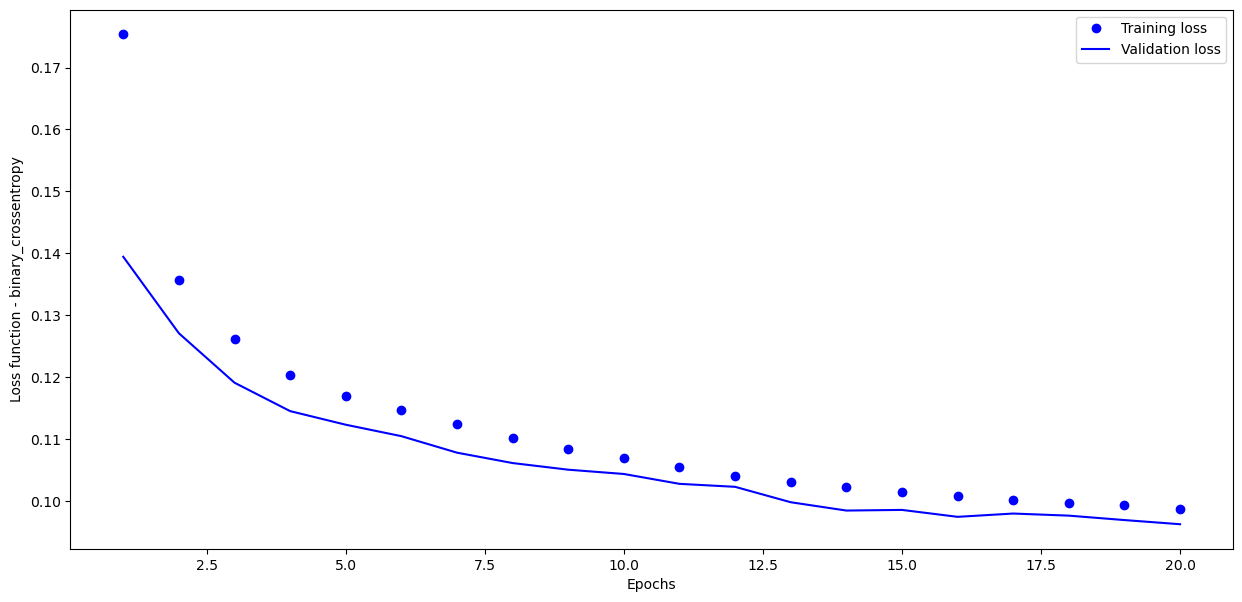

___________________________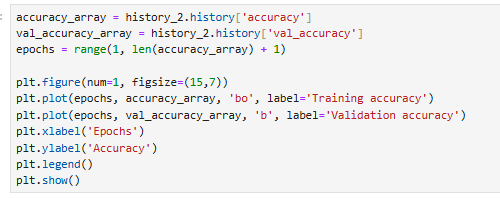

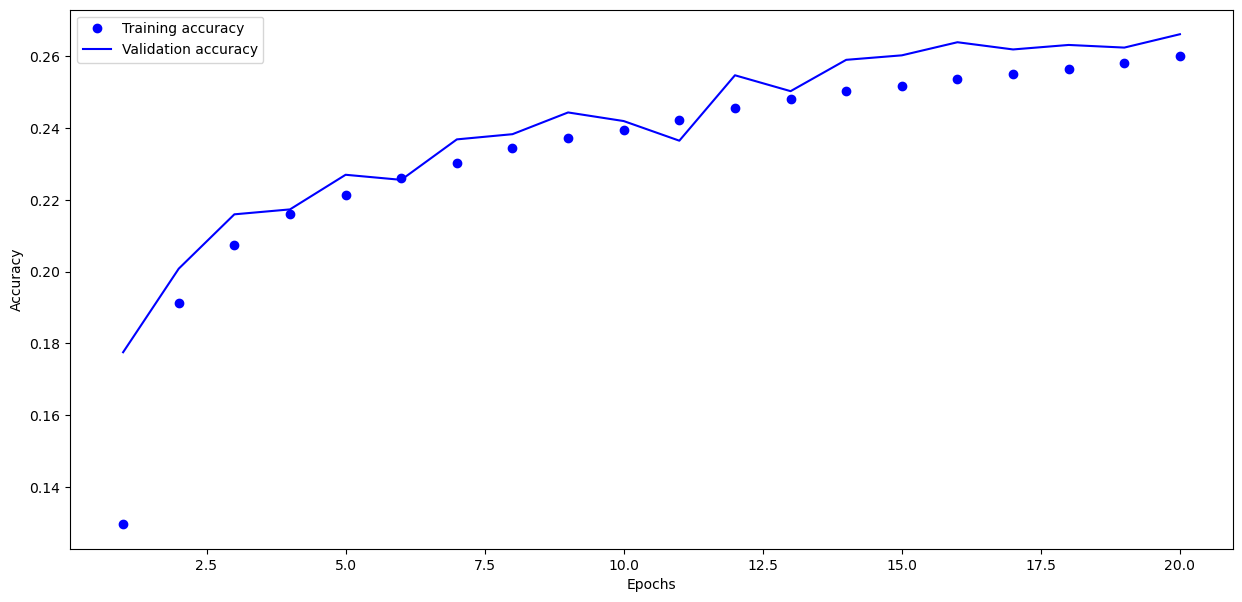

In [43]:
accuracy_array = history.history['accuracy']
val_accuracy_array=history.history['val_accuracy']
epochs=range(1, len(accuracy_array) +1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

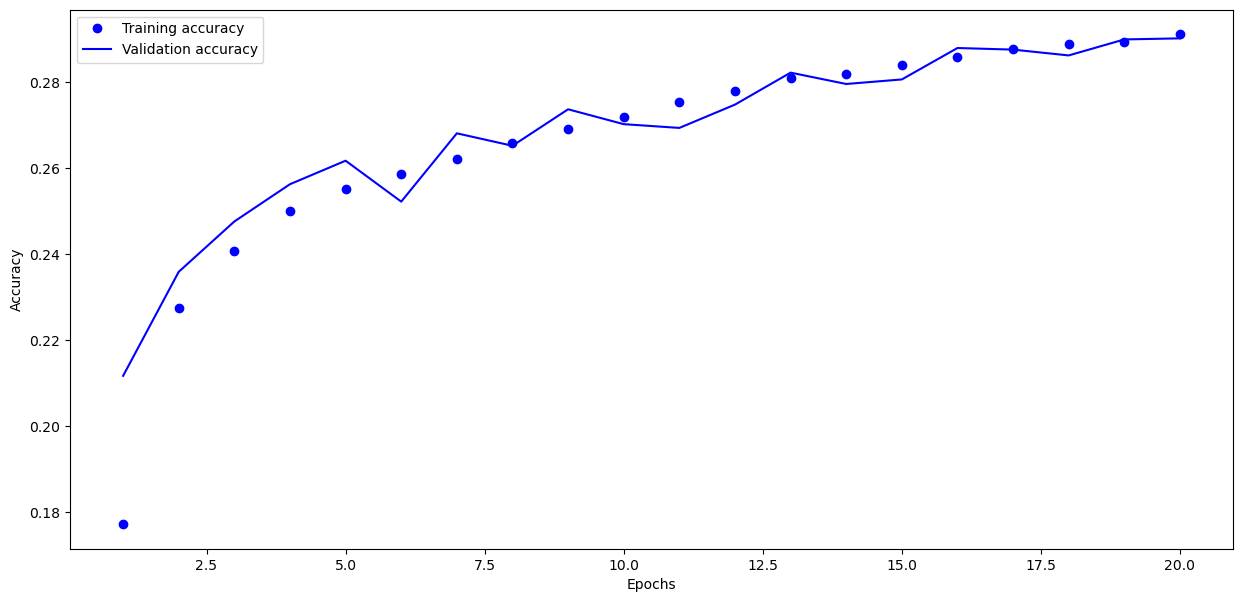

______________________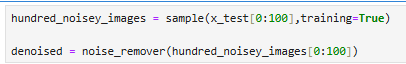

In [47]:
hundred_noisey_images = sample(x_test[0:100], training=True)
denoised = noise_remover(hundred_noisey_images[0:100])

______________________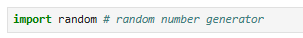

In [48]:
import random 

_______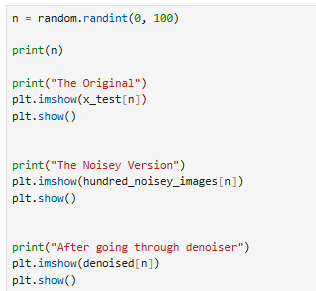

48
The Original


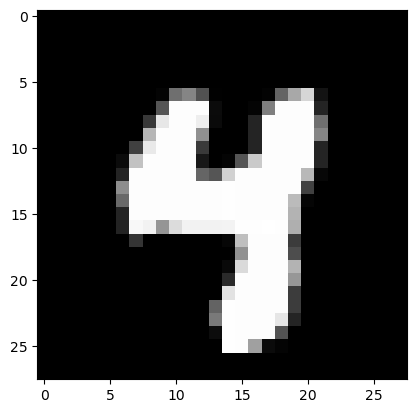

The Noisey Version


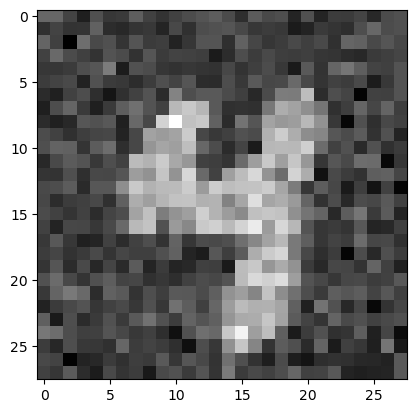

After going through denoiser


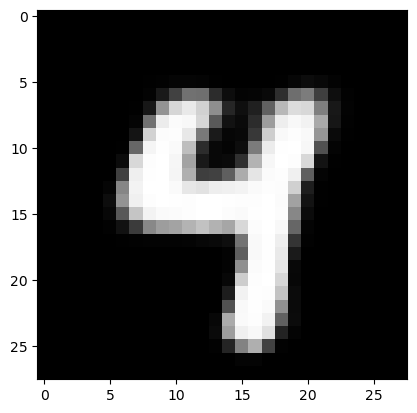

In [49]:
n=random.randint(0,100)
print(n)
print("The Original")
plt.imshow(x_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(hundred_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

56
The Original


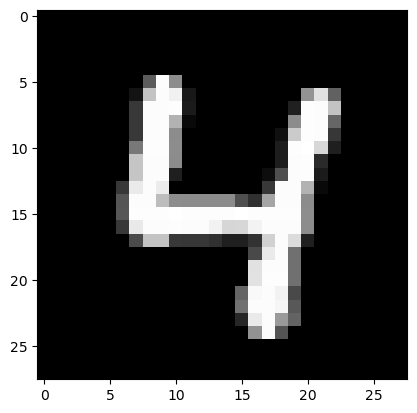

The Noisey Version


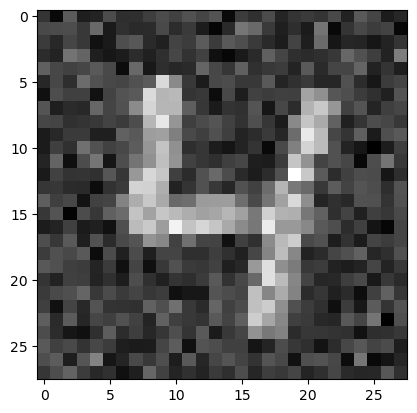

After going through denoiser


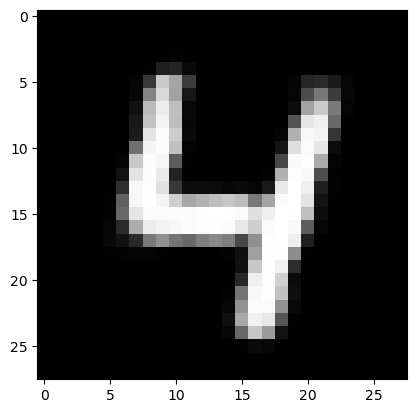

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

 - Put the Encoder, Decoder and Basic Autoencoder models using summary() in your lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present. Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.